### Laboratorium 3

In [1]:
# mnożenie macierzy - wersja naiwna
# size(A,1) - ilosc wierszy A     size(A,2) - ilosc kolumn A
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

# poprawiona funkcja korzytająca ze zmienionej kolejnosci operacji dodawania -> zmieniona kolejnosc petli
function better_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [2]:
using DataFrames, CSV
Dim = Int[]
Type = []

function measure_time()
time = Float64[]
    for t=1:3 #type - naive, better, BLAS
        for d=50:50:1000 #dimension of matrix
            A = rand(d, d);
            B = rand(d, d);
            for k=1:3 #number of measurements for one dim
                push!(Dim, d)
                if t == 1
                    push!(Type, "naive")
                    push!(time, @elapsed naive_multiplication(A,B))
                elseif t == 2
                    push!(Type, "better")
                    push!(time, @elapsed better_multiplication(A,B))
                else
                    push!(Type, "BLAS")
                    push!(time, @elapsed A*B)
                end
            end
        end
    end
return time
end

time_df = DataFrame()
time_df[:Dim] = Dim
time_df[:Type] = Type
time_df[:Time] = measure_time()

CSV.write("Lab3-results-Julia.csv", time_df)

"Lab3-results-Julia.csv"

In [3]:
using DataFrames, CSV, Statistics

input = "Lab3-results-Julia.csv"
data = DataFrame()
data = CSV.read(input, delim=",")

time_df = by(data, [:Dim,:Type], avgTime = :Time => mean, stdDev = :Time => std)

,Dim,Type,avgTime,stdDev
,Int64⍰,String⍰,Float64,Float64
1,50,naive,0.000338131,5.28755e-5
2,100,naive,0.00287988,0.000116403
3,150,naive,0.0111538,0.000623217
4,200,naive,0.0294119,0.00274268
5,250,naive,0.0502466,0.000524628
6,300,naive,0.0870671,0.00131867
7,350,naive,0.141389,0.00293844
8,400,naive,0.209728,0.00357819
9,450,naive,0.303599,0.000732283


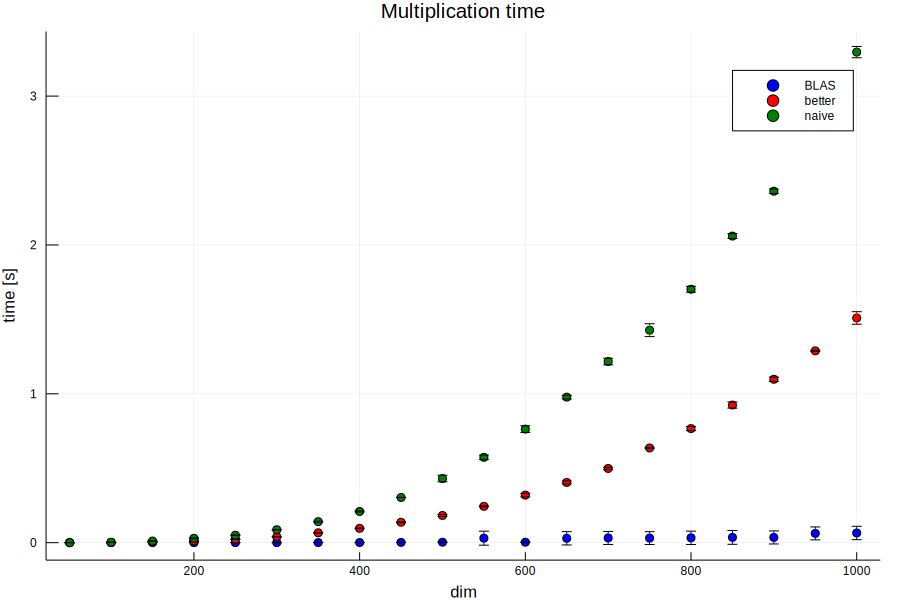

In [32]:
using DataFrames, CSV, Statistics, Plots

input = "Lab3-results-Julia.csv"
data = DataFrame()
data = CSV.read(input, delim=",")

time_df = by(data, [:Dim,:Type], avgTime = :Time => mean, stdDev = :Time => std)

p = scatter(time_df[:Dim],time_df[:avgTime], group = time_df[:Type], title = "Multiplication time",
    yerr = time_df[:stdDev], xlabel = "dim", ylabel = "time [s]",
    colour=[:blue :red :green], legend = true, markersize = 4, size=(900,600))

plot(p)

In [ ]:
2.Napisać w języku C:

- naiwną metodę mnożenia macierzy (wersja 1) 
- ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz 
przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
- skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 
Należy porównywać działanie tych trzech algorytmow bez włączonej opcji 
optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). 

(Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu.
               

In [ ]:
#include <stdio.h>
#include <gsl/gsl_blas.h>
#include <time.h>
#include <sys/time.h>

double calculate_time(struct timeval start, struct timeval end){
    double Time = (end.tv_sec - start.tv_sec) * 1000.0;
    Time += (end.tv_usec - start.tv_usec)/1000.0;
    return Time;
}

void naive_multiplication(double** A, double** B, double**C, int dim){
    for(int i = 0; i < dim; i++){
        for(int j = 0; j < dim; j++){
            for(int k = 0; k < dim; k++){
                C[i][j] = C[i][j] + A[i][k]*B[k][j];
            }
        }
    }
}

void better_multiplication(double** A, double** B, double**C, int dim){
    for(int i = 0; i < dim; i++){
        for(int k = 0; k < dim; k++){
            for(int j = 0; j < dim; j++){
                C[i][j] = C[i][j] + A[i][k]*B[k][j];
            }
        }
    }
}

int main(){

    char* path = "/home/aleksandra/Dokumenty/Mownit/Lab3/resultsLab3.csv";
    struct timeval n_start, n_end;
    struct timeval b_start, b_end;
    struct timeval blas_start, blas_end;

    FILE *file = fopen(path, "w");
    if(file == NULL){
        fprintf(stderr, "Problem with file opening\n");
        exit(-1);
    }
    
    fprintf(file, "Type;Dim;Time\n");

    for(int dim = 100; dim <= 1000; dim += 50){

        double** A = malloc(dim * sizeof * A);
        double** B = malloc(dim * sizeof * B);
        double** C = malloc(dim * sizeof * C);

        for (int m = 0; m < dim; m++){
            A[m] = malloc(dim * sizeof *A[m]);
            B[m] = malloc(dim * sizeof *B[m]);
            C[m] = malloc(dim * sizeof *C[m]);
        }

        gsl_matrix* M1 = gsl_matrix_alloc(dim, dim);
        gsl_matrix* M2 = gsl_matrix_alloc(dim, dim);
        gsl_matrix* M3 = gsl_matrix_alloc(dim, dim);
               
        for(int i = 0; i < dim; i++){
            for(int j = 0; j < dim; j++){
                A[i][j] = i*j*0.63;
                B[i][j] = i*j*0.79;
                C[i][j] = 0;
            }
        }       

        for(int i = 0; i < dim; i++){
            for(int j = 0; j < dim; j++){
                gsl_matrix_set(M1, i, j, i*j*0.63);
                gsl_matrix_set(M2, i, j, i*j*0.79);
                gsl_matrix_set(M3, i, j, 0);
            }
        }         
             

        for(int k = 0; k < 10; k++){
            gettimeofday(&n_start, NULL);
            naive_multiplication(A,B,C,dim);
            gettimeofday(&n_end, NULL);
            double n_Time = calculate_time(n_start, n_end);
            fprintf(file, "Naive;%i;%f\n", dim, n_Time);
        
            gettimeofday(&b_start, NULL);
            better_multiplication(A,B,C,dim);
            gettimeofday(&b_end, NULL);
            double b_Time = calculate_time(b_start, b_end);
            fprintf(file, "Better;%i;%f\n", dim, b_Time);

            gettimeofday(&blas_start, NULL);
            gsl_blas_dgemm(CblasNoTrans, CblasNoTrans, 1.0, M1, M2, 0.0, M3);
            gettimeofday(&blas_end, NULL);
            double Time = calculate_time(blas_start, blas_end);
            fprintf(file, "Blas,%d,%f\n", dim, Time);

        }          
        free(A);
        free(B);
        free(C);

        gsl_matrix_free(M1);
        gsl_matrix_free(M2);
        gsl_matrix_free(M3);
    }

    if(fclose(file) != 0){
        fprintf(stderr, "Problem with file closing\n");
    }
}


In [11]:
using DataFrames, CSV, Statistics, Plots

input = "Lab3-results-c.csv"
data = DataFrame()
data = CSV.read(input, delim=";")

time_df_C = by(data, [:Dim,:Type], avgTime = :Time => mean, stdDev = :Time => std)

,Dim,Type,avgTime,stdDev
,Int64⍰,String⍰,Float64,Float64
1,100,Blas,3.4054,2.92106
2,120,Blas,3.6763,2.77241
3,140,Blas,4.4465,2.73994
4,160,Blas,7.7937,2.38193
5,180,Blas,11.6756,2.96147
6,200,Blas,16.1177,2.80908
7,220,Blas,10.7751,0.596094
8,240,Blas,20.634,7.79839
9,260,Blas,38.9071,4.26197


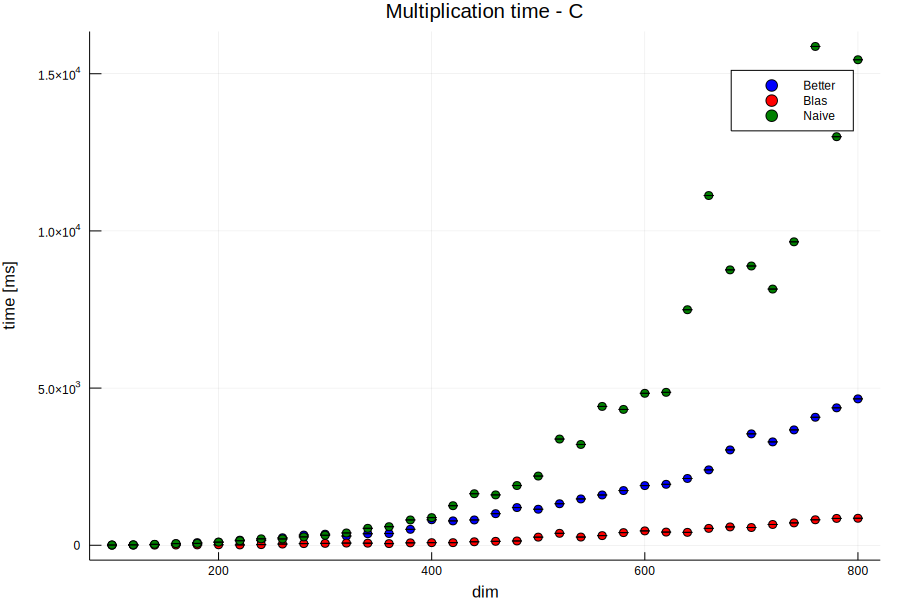

In [31]:
using DataFrames, CSV, Statistics, Plots

input = "Lab3-results-c.csv"
data = DataFrame()
data = CSV.read(input, delim=";")

time_df_C = by(data, [:Dim,:Type], avgTime = :Time => mean, stdDev = :Time => std)


p = scatter(time_df_C[:Dim], time_df_C[:avgTime], group=time_df_C[:Type], title="Multiplication time - C",
    yerr=time_df[:stdDev], xlabel="dim", ylabel="time [ms]",
    colour=[:blue :red :green], legend=true, markersize = 4, size=(900,600))

plot(p)

In [ ]:
3.Użyć funkcji polyfit z pakietu Polynomials do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do
zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. 
Dodać wykresy uzyskanych wielomianow do wczesniejszych wykresów.

In [13]:
## Dopasowanie wielomianu interpolacyjnego dla funkcji w Julii
using Polynomials
fit_naive_Julia = polyfit(time_df[1:20, :].Dim, time_df[1:20, :].avgTime, 3)
fit_better_Julia = polyfit(time_df[21:40, :].Dim, time_df[21:40, :].avgTime, 3)
fit_blas_Julia = polyfit(time_df[41:60, :].Dim, time_df[41:60, :].avgTime, 3)

Poly(0.001836688577158563 - 2.9797987220705442e-5*x + 8.719818966504828e-8*x^2 + 2.849119835679085e-12*x^3)

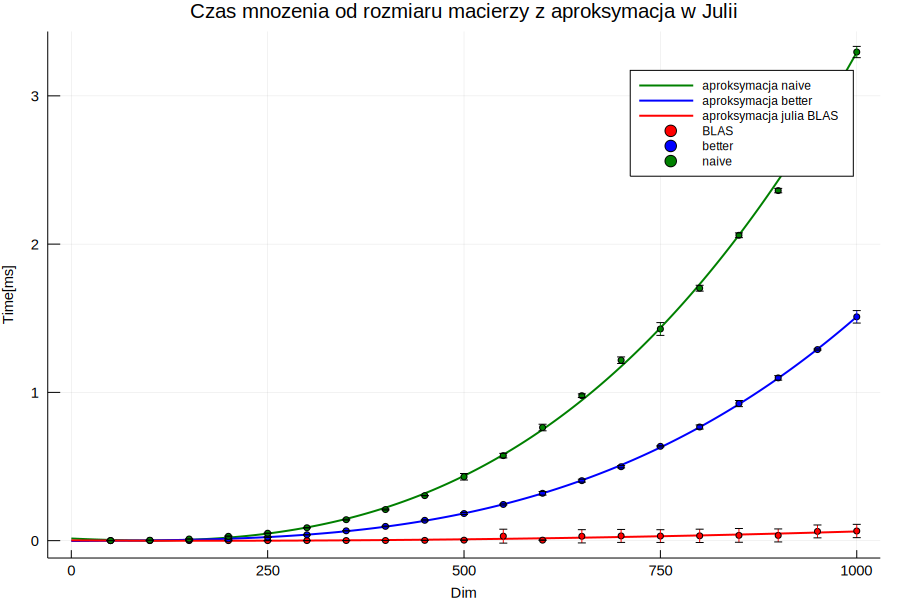

In [27]:
using Polynomials, Statistics, DataFrames, Plots

xd = 0:0.1:1000

plot(xd, polyval(fit_naive_Julia, xd), label = "aproksymacja naive", linewidth = 2, colour = :green)
plot!(xd, polyval(fit_better_Julia, xd), label = "aproksymacja better", linewidth = 2, colour = :blue)
plot!(xd, polyval(fit_blas_Julia, xd), label = "aproksymacja julia BLAS", linewidth = 2, colour = :red)
scatter!(time_df[:Dim], time_df[:avgTime], group = time_df[:Type], yerr = time_df[:stdDev],
     legend = true, markersize = 3, colour = [:red :blue :green], size = (900,600), 
     title = "Czas mnozenia od rozmiaru macierzy z aproksymacja w Julii",
     xaxis = ("Dim", font(10)), yaxis = ("Time[ms]", font(10)))

In [16]:
## Dopasowanie wielomianu interpolacyjnego dla funkcji w C
using Polynomials
fit_blas_C = polyfit(time_df_C[1:36, :].Dim, time_df_C[1:36, :].avgTime, 3)
fit_better_C = polyfit(time_df_C[37:72, :].Dim, time_df_C[37:72, :].avgTime, 3)
fit_naive_C = polyfit(time_df_C[73:108, :].Dim, time_df_C[73:108, :].avgTime, 3)

Poly(51.230017668881565 + 1.6276533384120242*x - 0.017986301215763126*x^2 + 4.972939943735211e-5*x^3)

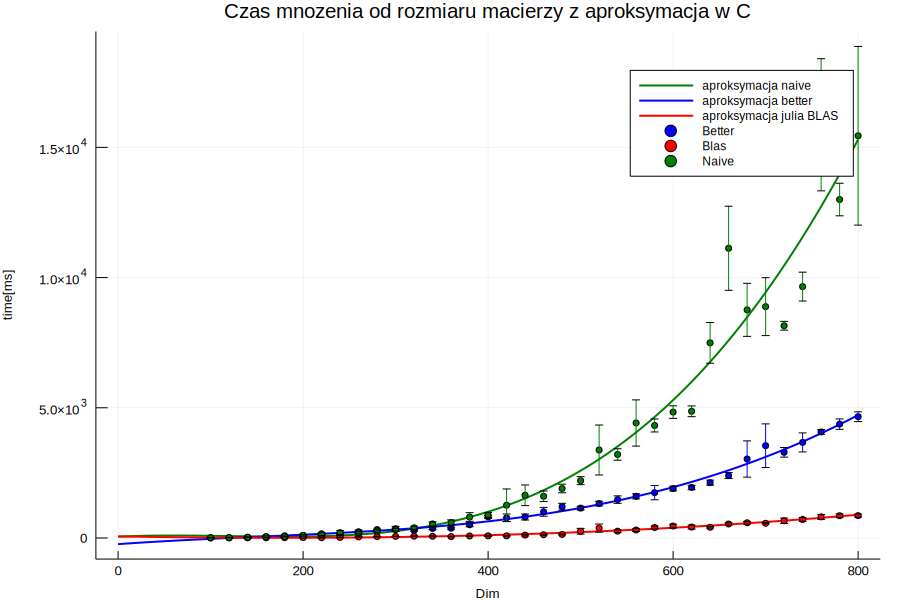

In [25]:
using Polynomials, Statistics, DataFrames, Plots

xd=0:0.1:800

plot(xd, polyval(fit_naive_C,xd), label = "aproksymacja naive", linewidth = 2, colour = :green)
plot!(xd, polyval(fit_better_C,xd), label = "aproksymacja better", linewidth = 2, colour = :blue)
plot!(xd, polyval(fit_blas_C,xd), label = "aproksymacja julia BLAS", linewidth = 2, colour = :red)
scatter!(time_df_C[:Dim], time_df_C[:avgTime], group = time_df_C[:Type], yerr = time_df_C[:stdDev],
     legend = true, markersize = 3, colour = [:blue :red :green], size = (900,600),
     title = "Czas mnozenia od rozmiaru macierzy z aproksymacja w C",
     xaxis = ("Dim", font(9)), yaxis = ("time[ms]", font(9)))